In [68]:
import numpy as np
import matplotlib.pyplot as plt

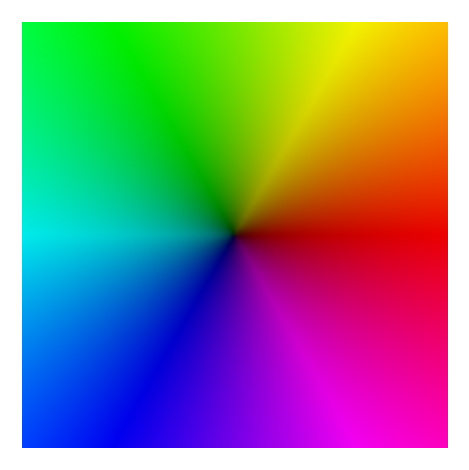

In [1]:
P = complex_plot(x, [-2, 2], [-2, 2])
P.axes(False)
P.show(aspect_ratio=1)

In [2]:
P.save("default_identity.png", figsize=15, aspect_ratio=1)

In [3]:
DtoH = lambda x: (-CDF.0*x + 1)/(x - CDF.0)
Htoq = lambda x: exp(2*CDF.pi()*CDF.0*x)
Dtoq = lambda x: Htoq(DtoH(CDF(x)))

In [60]:
# the delta function
f = ModularForms(group=1, weight=12).newforms()[0].q_expansion(200).truncate()

# a space with 2 cusp forms
MM = ModularForms(group=1, weight=24)
ccc = MM.cuspidal_subspace()
g1 = ccc.basis()[0]
g2 = ccc.basis()[1]
# reasonable approximations
gg1 = g1.q_expansion(200).truncate()
gg2 = g2.q_expansion(200).truncate()

# approximate maxima
GG1 = gg1(Htoq(0.25))
GG2 = gg2(Htoq(0.55))

g = lambda x: gg1(x)/GG1 + gg2(x)/GG2

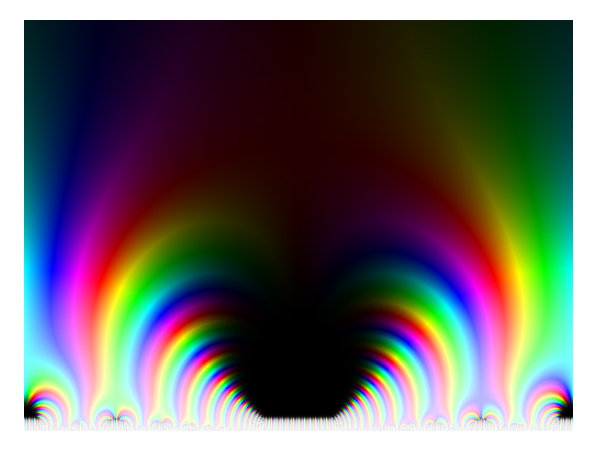

In [9]:
P = complex_plot(lambda x: f(Htoq(x)), (-1/2, 1/2), (0.001, 0.75),
                 plot_points=500, figsize=7)
P.axes(show=False)
P.show(aspect_ratio=1)

In [11]:
P.save("default_f_onH.png", figsize=15, aspect_ratio=1)

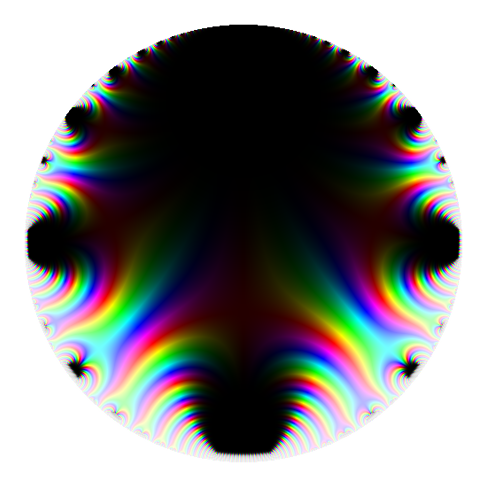

In [12]:
P = complex_plot(lambda x: +Infinity if abs(x) >= 0.99 else f(Dtoq(x)), (-1,1),(-1,1),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
P.axes(False)
P.show()

In [13]:
P.save("default_f_onD.png", figsize=15, aspect_ratio=1)

In [14]:
def normalize(complexval):
    return 2*exp(2 * pi * i * complexval.abs())

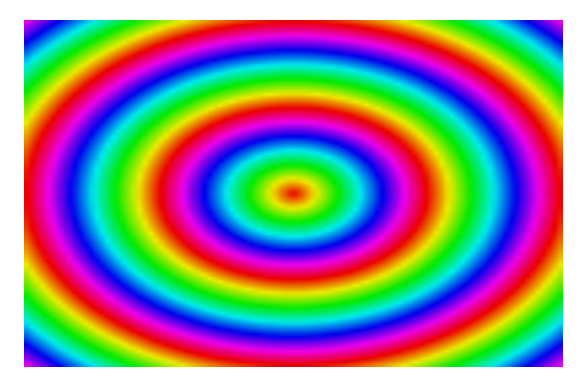

In [15]:
thisf = lambda x: normalize(x)
P = complex_plot(thisf, [-2, 2], [-2, 2])
P.axes(False)
P.show()

In [16]:
P.save("regspace_identity.png", figsize=15, aspect_ratio=1)

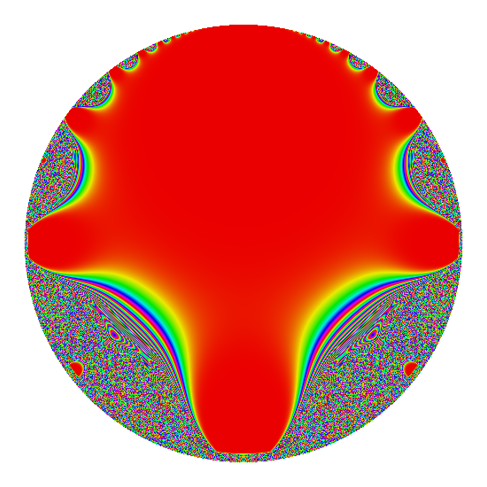

In [18]:
thisf = lambda x: normalize(f(Dtoq(x)))
P = complex_plot(lambda x: +Infinity if abs(x) >= 0.99 else thisf(x), (-1,1),(-1,1),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
P.axes(False)
P.show()

In [19]:
P.save("regspace_f_onD.png", figsize=15, aspect_ratio=1)

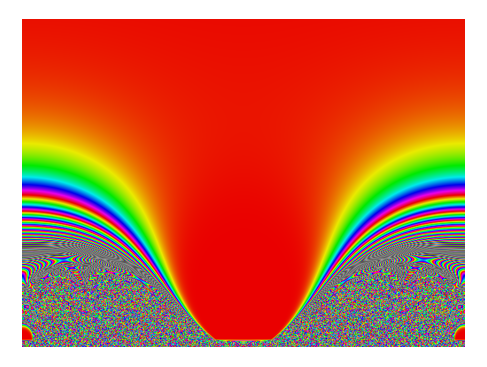

In [27]:
thisf = lambda x: normalize(f(Htoq(x)))
P = complex_plot(lambda x: thisf(x), (-.5,.5),(0.01,0.75),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
P.axes(False)
P.show()

In [28]:
P.save("regspace_f_onH.png", figsize=15, aspect_ratio=1)

In [22]:
def normalize_log(complexval):
    return 2*exp(2 * pi * i * log(complexval.abs()))

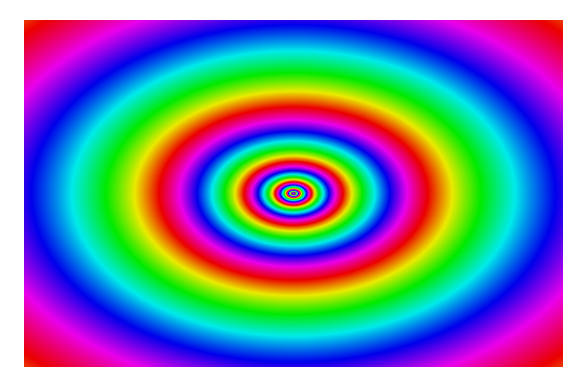

In [31]:
thisf = lambda x: normalize_log(x)
P = complex_plot(thisf, [-2, 2], [-2, 2], plot_points=500)
P.axes(False)
P.show()

In [32]:
P.save("multspace_identity.png", figsize=15, aspect_ratio=1)

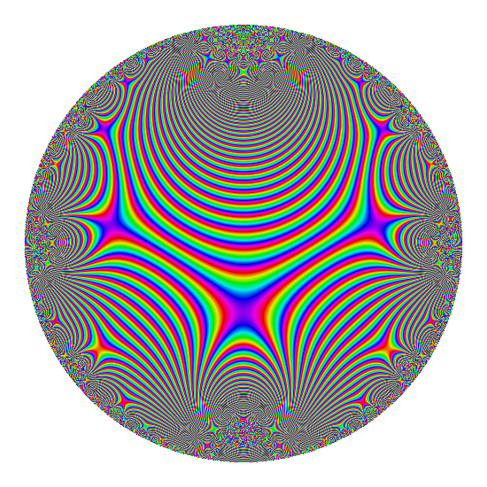

In [25]:
thisf = lambda x: normalize_log(f(Dtoq(x)))
P = complex_plot(lambda x: +Infinity if abs(x) >= 0.99 else thisf(x), (-1,1),(-1,1),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
P.axes(False)
P.show()

In [26]:
P.save("multspace_f_onD.png", figsize=15, aspect_ratio=1)

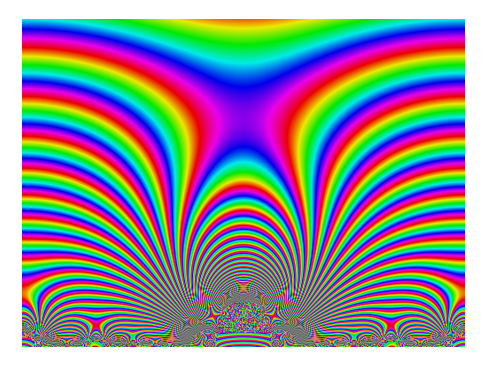

In [29]:
thisf = lambda x: normalize_log(f(Htoq(x)))
P = complex_plot(lambda x: thisf(x), (-.5,.5),(0.01,0.75),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
P.axes(False)
P.show()

In [30]:
P.save("multspace_f_onH.png", figsize=15, aspect_ratio=1)

## What follows relies on my own code more heavily

In [35]:
## Only need to do once to create the shared object from the cython code

#import sage.misc.cython
#sage.misc.cython.cython_create_local_so("myplot.spyx")

/home/davidlowryduda/sagebuild/sage2/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:2: DeprecationWarning: cython_create_local_so is deprecated, call cython() with the create_local_so_file=True keyword
See http://trac.sagemath.org/24722 for details.
  from sage.repl.ipython_kernel.kernel import SageKernel
Compiling myplot.spyx...


In [36]:
from myplot import ccomplex_plot

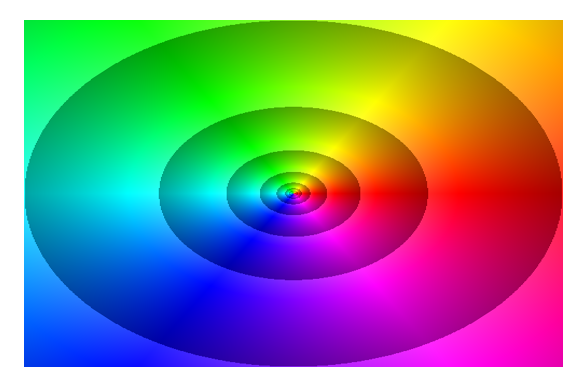

In [37]:
thisf = lambda x: x
P = ccomplex_plot(thisf, [-2, 2], [-2, 2], plot_points=500)
P.axes(False)
P.show()

In [38]:
P.save("my_identity.png", figsize=15, aspect_ratio=1)

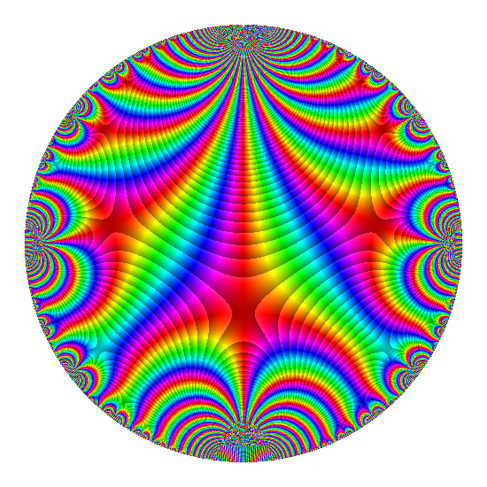

In [41]:
P = ccomplex_plot(lambda x: +Infinity if abs(x) >= 0.99 else f(Dtoq(x)), (-1,1),(-1,1),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])

### slightly complicated nonsense
rgbs = P[0].rgb_data
inds = np.where(np.isnan(rgbs))
rgbs[inds] = 1.
### end complicated nonsense

P.axes(show=False)
P.show()

In [42]:
P.save("my_f_onD.png", figsize=15, aspect_ratio=1)

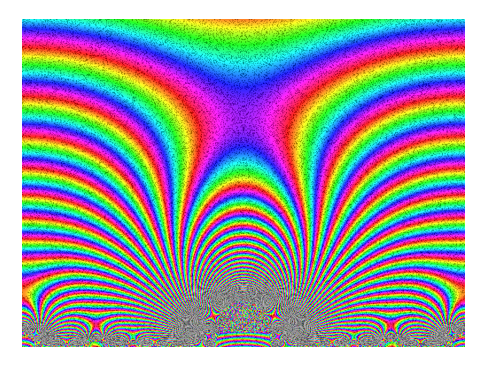

In [43]:
# ERROR WRONG INPUT
thisf = lambda x: normalize_log(f(Htoq(x)))
P = ccomplex_plot(lambda x: thisf(x), (-.5,.5),(0.01,0.75),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
P.axes(False)
P.show()

In [45]:
# DO NOT COPY
P.save("my_f_onH.weird.png", figsize=15, aspect_ratio=1)

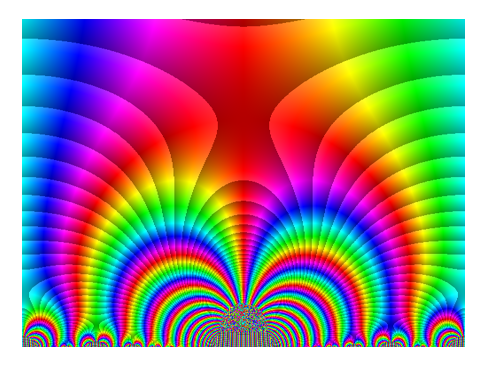

In [46]:
P = ccomplex_plot(lambda x: f(Htoq(x)), (-.5,.5),(0.01,0.75),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
P.axes(False)
P.show()

In [47]:
P.save("my_f_onH.png", figsize=15, aspect_ratio=1)

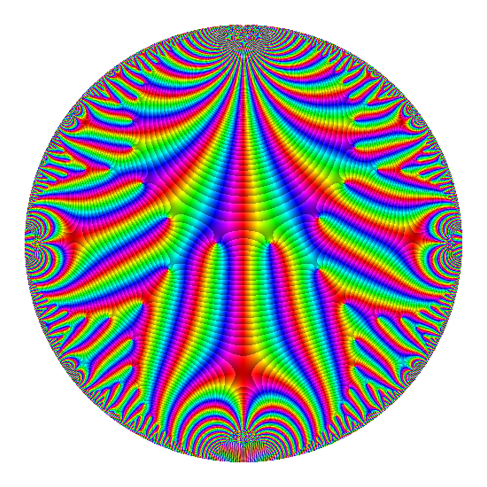

In [55]:
P = ccomplex_plot(lambda x: +Infinity if abs(x) >= 0.99 else g(Dtoq(x)), (-1,1),(-1,1),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])

### slightly complicated nonsense
rgbs = P[0].rgb_data
inds = np.where(np.isnan(rgbs))
rgbs[inds] = 1.
### end complicated nonsense

P.axes(show=False)
P.show()

In [56]:
P.save("my_g_onD.png", figsize=15, aspect_ratio=1)

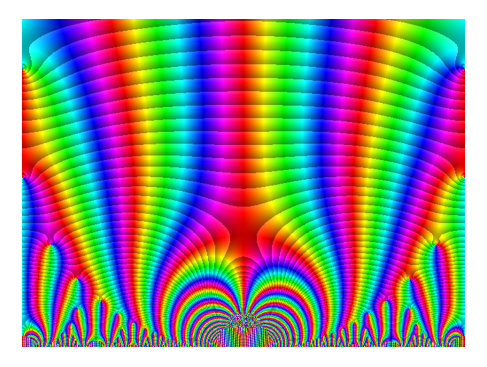

In [57]:
P = ccomplex_plot(lambda x: g(Htoq(x)), (-.5,.5),(0.01,0.75),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
P.axes(False)
P.show()

In [58]:
P.save("my_g_onH.png", figsize=15, aspect_ratio=1)

In [61]:
load("colormapplot.spyx")

Compiling ./colormapplot.spyx...


In [62]:
preparser(False)

In [63]:
from matplotlib.colors import ListedColormap
_twilight_data = [
    [0.88575015840754434, 0.85000924943067835,  0.8879736506427196],
    [0.88378520195539056, 0.85072940540310626,  0.88723222096949894],
    [0.88172231059285788, 0.85127594077653468,  0.88638056925514819],
    [0.8795410528270573,  0.85165675407495722,  0.8854143767924102],
    [0.87724880858965482, 0.85187028338870274,  0.88434120381311432],
    [0.87485347508575972, 0.85191526123023187,  0.88316926967613829],
    [0.87233134085124076, 0.85180165478080894,  0.88189704355001619],
    [0.86970474853509816, 0.85152403004797894,  0.88053883390003362],
    [0.86696015505333579, 0.8510896085314068,   0.87909766977173343],
    [0.86408985081463996, 0.85050391167507788,  0.87757925784892632],
    [0.86110245436899846, 0.84976754857001258,  0.87599242923439569],
    [0.85798259245670372, 0.84888934810281835,  0.87434038553446281],
    [0.85472593189256985, 0.84787488124672816,  0.8726282980930582],
    [0.85133714570857189, 0.84672735796116472,  0.87086081657350445],
    [0.84780710702577922, 0.8454546229209523,   0.86904036783694438],
    [0.8441261828674842,  0.84406482711037389,  0.86716973322690072],
    [0.84030420805957784, 0.8425605950855084,   0.865250882410458],
    [0.83634031809191178, 0.84094796518951942,  0.86328528001070159],
    [0.83222705712934408, 0.83923490627754482,  0.86127563500427884],
    [0.82796894316013536, 0.83742600751395202,  0.85922399451306786],
    [0.82357429680252847, 0.83552487764795436,  0.85713191328514948],
    [0.81904654677937527, 0.8335364929949034,   0.85500206287010105],
    [0.81438982121143089, 0.83146558694197847,  0.85283759062147024],
    [0.8095999819094809,  0.82931896673505456,  0.85064441601050367],
    [0.80469164429814577, 0.82709838780560663,  0.84842449296974021],
    [0.79967075421267997, 0.82480781812080928,  0.84618210029578533],
    [0.79454305089231114, 0.82245116226304615,  0.84392184786827984],
    [0.78931445564608915, 0.82003213188702007,  0.8416486380471222],
    [0.78399101042764918, 0.81755426400533426,  0.83936747464036732],
    [0.77857892008227592, 0.81502089378742548,  0.8370834463093898],
    [0.77308416590170936, 0.81243524735466011,  0.83480172950579679],
    [0.76751108504417864, 0.8098007598713145,   0.83252816638059668],
    [0.76186907937980286, 0.80711949387647486,  0.830266486168872],
    [0.75616443584381976, 0.80439408733477935,  0.82802138994719998],
    [0.75040346765406696, 0.80162699008965321,  0.82579737851082424],
    [0.74459247771890169, 0.79882047719583249,  0.82359867586156521],
    [0.73873771700494939, 0.79597665735031009,  0.82142922780433014],
    [0.73284543645523459, 0.79309746468844067,  0.81929263384230377],
    [0.72692177512829703, 0.7901846863592763,   0.81719217466726379],
    [0.72097280665536778, 0.78723995923452639,  0.81513073920879264],
    [0.71500403076252128, 0.78426487091581187,  0.81311116559949914],
    [0.70902078134539304, 0.78126088716070907,  0.81113591855117928],
    [0.7030297722540817,  0.77822904973358131,  0.80920618848056969],
    [0.6970365443886174,  0.77517050008066057,  0.80732335380063447],
    [0.69104641009309098, 0.77208629460678091,  0.80548841690679074],
    [0.68506446154395928, 0.7689774029354699,   0.80370206267176914],
    [0.67909554499882152, 0.76584472131395898,  0.8019646617300199],
    [0.67314422559426212, 0.76268908733890484,  0.80027628545809526],
    [0.66721479803752815, 0.7595112803730375,   0.79863674654537764],
    [0.6613112930078745,  0.75631202708719025,  0.7970456043491897],
    [0.65543692326454717, 0.75309208756768431,  0.79550271129031047],
    [0.64959573004253479, 0.74985201221941766,  0.79400674021499107],
    [0.6437910831099849,  0.7465923800833657,   0.79255653201306053],
    [0.63802586828545982, 0.74331376714033193,  0.79115100459573173],
    [0.6323027138710603,  0.74001672160131404,  0.78978892762640429],
    [0.62662402022604591, 0.73670175403699445,  0.78846901316334561],
    [0.62099193064817548, 0.73336934798923203,  0.78718994624696581],
    [0.61540846411770478, 0.73001995232739691,  0.78595022706750484],
    [0.60987543176093062, 0.72665398759758293,  0.78474835732694714],
    [0.60439434200274855, 0.7232718614323369,   0.78358295593535587],
    [0.5989665814482068,  0.71987394892246725,  0.78245259899346642],
    [0.59359335696837223, 0.7164606049658685,   0.78135588237640097],
    [0.58827579780555495, 0.71303214646458135,  0.78029141405636515],
    [0.58301487036932409, 0.70958887676997473,  0.77925781820476592],
    [0.5778116438998202,  0.70613106157153982,  0.77825345121025524],
    [0.5726668948158774,  0.7026589535425779,   0.77727702680911992],
    [0.56758117853861967, 0.69917279302646274,  0.77632748534275298],
    [0.56255515357219343, 0.69567278381629649,  0.77540359142309845],
    [0.55758940419605174, 0.69215911458254054,  0.7745041337932782],
    [0.55268450589347129, 0.68863194515166382,  0.7736279426902245],
    [0.54784098153018634, 0.68509142218509878,  0.77277386473440868],
    [0.54305932424018233, 0.68153767253065878,  0.77194079697835083],
    [0.53834015575176275, 0.67797081129095405,  0.77112734439057717],
    [0.53368389147728401, 0.67439093705212727,  0.7703325054879735],
    [0.529090861832473,   0.67079812302806219,  0.76955552292313134],
    [0.52456151470593582, 0.66719242996142225,  0.76879541714230948],
    [0.52009627392235558, 0.66357391434030388,  0.76805119403344102],
    [0.5156955988596057,  0.65994260812897998,  0.76732191489596169],
    [0.51135992541601927, 0.65629853981831865,  0.76660663780645333],
    [0.50708969576451657, 0.65264172403146448,  0.76590445660835849],
    [0.5028853540415561,  0.64897216734095264,  0.76521446718174913],
    [0.49874733661356069, 0.6452898684900934,   0.76453578734180083],
    [0.4946761847863938,  0.64159484119504429,  0.76386719002130909],
    [0.49067224938561221, 0.63788704858847078,  0.76320812763163837],
    [0.4867359599430568,  0.63416646251100506,  0.76255780085924041],
    [0.4828677867260272,  0.6304330455306234,   0.76191537149895305],
    [0.47906816236197386, 0.62668676251860134,  0.76128000375662419],
    [0.47533752394906287, 0.62292757283835809,  0.76065085571817748],
    [0.47167629518877091, 0.61915543242884641,  0.76002709227883047],
    [0.46808490970531597, 0.61537028695790286,  0.75940789891092741],
    [0.46456376716303932, 0.61157208822864151,  0.75879242623025811],
    [0.46111326647023881, 0.607760777169989,    0.75817986436807139],
    [0.45773377230160567, 0.60393630046586455,  0.75756936901859162],
    [0.45442563977552913, 0.60009859503858665,  0.75696013660606487],
    [0.45118918687617743, 0.59624762051353541,  0.75635120643246645],
    [0.44802470933589172, 0.59238331452146575,  0.75574176474107924],
    [0.44493246854215379, 0.5885055998308617,   0.7551311041857901],
    [0.44191271766696399, 0.58461441100175571,  0.75451838884410671],
    [0.43896563958048396, 0.58070969241098491,  0.75390276208285945],
    [0.43609138958356369, 0.57679137998186081,  0.7532834105961016],
    [0.43329008867358393, 0.57285941625606673,  0.75265946532566674],
    [0.43056179073057571, 0.56891374572457176,  0.75203008099312696],
    [0.42790652284925834, 0.5649543060909209,   0.75139443521914839],
    [0.42532423665011354, 0.56098104959950301,  0.75075164989005116],
    [0.42281485675772662, 0.55699392126996583,  0.75010086988227642],
    [0.42037822361396326, 0.55299287158108168,  0.7494412559451894],
    [0.41801414079233629, 0.54897785421888889,  0.74877193167001121],
    [0.4157223260454232,  0.54494882715350401,  0.74809204459000522],
    [0.41350245743314729, 0.54090574771098476,  0.74740073297543086],
    [0.41135414697304568, 0.53684857765005933,  0.74669712855065784],
    [0.4092768899914751,  0.53277730177130322,  0.74598030635707824],
    [0.40727018694219069, 0.52869188011057411,  0.74524942637581271],
    [0.40533343789303178, 0.52459228174983119,  0.74450365836708132],
    [0.40346600333905397, 0.52047847653840029,  0.74374215223567086],
    [0.40166714010896104, 0.51635044969688759,  0.7429640345324835],
    [0.39993606933454834, 0.51220818143218516,  0.74216844571317986],
    [0.3982719152586337,  0.50805166539276136,  0.74135450918099721],
    [0.39667374905665609, 0.50388089053847973,  0.74052138580516735],
    [0.39514058808207631, 0.49969585326377758,  0.73966820211715711],
    [0.39367135736822567, 0.49549655777451179,  0.738794102296364],
    [0.39226494876209317, 0.49128300332899261,  0.73789824784475078],
    [0.39092017571994903, 0.48705520251223039,  0.73697977133881254],
    [0.38963580160340855, 0.48281316715123496,  0.73603782546932739],
    [0.38841053300842432, 0.47855691131792805,  0.73507157641157261],
    [0.38724301459330251, 0.47428645933635388,  0.73408016787854391],
    [0.38613184178892102, 0.4700018340988123,   0.7330627749243106],
    [0.38507556793651387, 0.46570306719930193,  0.73201854033690505],
    [0.38407269378943537, 0.46139018782416635,  0.73094665432902683],
    [0.38312168084402748, 0.45706323581407199,  0.72984626791353258],
    [0.38222094988570376, 0.45272225034283325,  0.72871656144003782],
    [0.38136887930454161, 0.44836727669277859,  0.72755671317141346],
    [0.38056380696565623, 0.44399837208633719,  0.72636587045135315],
    [0.37980403744848751, 0.43961558821222629,  0.72514323778761092],
    [0.37908789283110761, 0.43521897612544935,  0.72388798691323131],
    [0.378413635091359,   0.43080859411413064,  0.72259931993061044],
    [0.37777949753513729, 0.4263845142616835,   0.72127639993530235],
    [0.37718371844251231, 0.42194680223454828,  0.71991841524475775],
    [0.37662448930806297, 0.41749553747893614,  0.71852454736176108],
    [0.37610001286385814, 0.41303079952477062,  0.71709396919920232],
    [0.37560846919442398, 0.40855267638072096,  0.71562585091587549],
    [0.37514802505380473, 0.4040612609993941,   0.7141193695725726],
    [0.37471686019302231, 0.3995566498711684,   0.71257368516500463],
    [0.37431313199312338, 0.39503894828283309,  0.71098796522377461],
    [0.37393499330475782, 0.39050827529375831,  0.70936134293478448],
    [0.3735806215098284,  0.38596474386057539,  0.70769297607310577],
    [0.37324816143326384, 0.38140848555753937,  0.70598200974806036],
    [0.37293578646665032, 0.37683963835219841,  0.70422755780589941],
    [0.37264166757849604, 0.37225835004836849,  0.7024287314570723],
    [0.37236397858465387, 0.36766477862108266,  0.70058463496520773],
    [0.37210089702443822, 0.36305909736982378,  0.69869434615073722],
    [0.3718506155898596,  0.35844148285875221,  0.69675695810256544],
    [0.37161133234400479, 0.3538121372967869,   0.69477149919380887],
    [0.37138124223736607, 0.34917126878479027,  0.69273703471928827],
    [0.37115856636209105, 0.34451911410230168,  0.69065253586464992],
    [0.37094151551337329, 0.33985591488818123,  0.68851703379505125],
    [0.37072833279422668, 0.33518193808489577,  0.68632948169606767],
    [0.37051738634484427, 0.33049741244307851,  0.68408888788857214],
    [0.37030682071842685, 0.32580269697872455,  0.68179411684486679],
    [0.37009487130772695, 0.3210981375964933,   0.67944405399056851],
    [0.36987980329025361, 0.31638410101153364,  0.67703755438090574],
    [0.36965987626565955, 0.31166098762951971,  0.67457344743419545],
    [0.36943334591276228, 0.30692923551862339,  0.67205052849120617],
    [0.36919847837592484, 0.30218932176507068,  0.66946754331614522],
    [0.36895355306596778, 0.29744175492366276,  0.66682322089824264],
    [0.36869682231895268, 0.29268709856150099,  0.66411625298236909],
    [0.36842655638020444, 0.28792596437778462,  0.66134526910944602],
    [0.36814101479899719, 0.28315901221182987,  0.65850888806972308],
    [0.36783843696531082, 0.27838697181297761,  0.65560566838453704],
    [0.36751707094367697, 0.27361063317090978,  0.65263411711618635],
    [0.36717513650699446, 0.26883085667326956,  0.64959272297892245],
    [0.36681085540107988, 0.26404857724525643,  0.64647991652908243],
    [0.36642243251550632, 0.25926481158628106,  0.64329409140765537],
    [0.36600853966739794, 0.25448043878086224,  0.64003361803368586],
    [0.36556698373538982, 0.24969683475296395,  0.63669675187488584],
    [0.36509579845886808, 0.24491536803550484,  0.63328173520055586],
    [0.36459308890125008, 0.24013747024823828,  0.62978680155026101],
    [0.36405693022088509, 0.23536470386204195,  0.62621013451953023],
    [0.36348537610385145, 0.23059876218396419,  0.62254988622392882],
    [0.36287643560041027, 0.22584149293287031,  0.61880417410823019],
    [0.36222809558295926, 0.22109488427338303,  0.61497112346096128],
    [0.36153829010998356, 0.21636111429594002,  0.61104880679640927],
    [0.36080493826624654, 0.21164251793458128,  0.60703532172064711],
    [0.36002681809096376, 0.20694122817889948,  0.60292845431916875],
    [0.35920088560930186, 0.20226037920758122,  0.5987265295935138],
    [0.35832489966617809, 0.197602942459778,    0.59442768517501066],
    [0.35739663292915563, 0.19297208197842461,  0.59003011251063131],
    [0.35641381143126327, 0.18837119869242164,  0.5855320765920552],
    [0.35537415306906722, 0.18380392577704466,  0.58093191431832802],
    [0.35427534960663759, 0.17927413271618647,  0.57622809660668717],
    [0.35311574421123737, 0.17478570377561287,  0.57141871523555288],
    [0.35189248608873791, 0.17034320478524959,  0.56650284911216653],
    [0.35060304441931012, 0.16595129984720861,  0.56147964703993225],
    [0.34924513554955644, 0.16161477763045118,  0.55634837474163779],
    [0.34781653238777782, 0.15733863511152979,  0.55110853452703257],
    [0.34631507175793091, 0.15312802296627787,  0.5457599924248665],
    [0.34473901574536375, 0.14898820589826409,  0.54030245920406539],
    [0.34308600291572294, 0.14492465359918028,  0.53473704282067103],
    [0.34135411074506483, 0.1409427920655632,   0.52906500940336754],
    [0.33954168752669694, 0.13704801896718169,  0.52328797535085236],
    [0.33764732090671112, 0.13324562282438077,  0.51740807573979475],
    [0.33566978565015315, 0.12954074251271822,  0.51142807215168951],
    [0.33360804901486002, 0.12593818301005921,  0.50535164796654897],
    [0.33146154891145124, 0.12244245263391232,  0.49918274588431072],
    [0.32923005203231409, 0.11905764321981127,  0.49292595612342666],
    [0.3269137124539796,  0.1157873496841953,   0.48658646495697461],
    [0.32451307931207785, 0.11263459791730848,  0.48017007211645196],
    [0.32202882276069322, 0.10960114111258401,  0.47368494725726878],
    [0.31946262395497965, 0.10668879882392659,  0.46713728801395243],
    [0.31681648089023501, 0.10389861387653518,  0.46053414662739794],
    [0.31409278414755532, 0.10123077676403242,  0.45388335612058467],
    [0.31129434479712365, 0.098684771934052201, 0.44719313715161618],
    [0.30842444457210105, 0.096259385340577736, 0.44047194882050544],
    [0.30548675819945936, 0.093952764840823738, 0.43372849999361113],
    [0.30248536364574252, 0.091761187397303601, 0.42697404043749887],
    [0.29942483960214772, 0.089682253716750038, 0.42021619665853854],
    [0.29631000388905288, 0.087713250960463951, 0.41346259134143476],
    [0.29314593096985248, 0.085850656889620708, 0.40672178082365834],
    [0.28993792445176608, 0.08409078829085731,  0.40000214725256295],
    [0.28669151388283165, 0.082429873848480689, 0.39331182532243375],
    [0.28341239797185225, 0.080864153365499375, 0.38665868550105914],
    [0.28010638576975472, 0.079389994802261526, 0.38005028528138707],
    [0.27677939615815589, 0.078003941033788216, 0.37349382846504675],
    [0.27343739342450812, 0.076702800237496066, 0.36699616136347685],
    [0.27008637749114051, 0.075483675584275545, 0.36056376228111864],
    [0.26673233211995284, 0.074344018028546205, 0.35420276066240958],
    [0.26338121807151404, 0.073281657939897077, 0.34791888996380105],
    [0.26003895187439957, 0.072294781043362205, 0.3417175669546984],
    [0.25671191651083902, 0.071380106242082242, 0.33560648984600089],
    [0.25340685873736807, 0.070533582926851829, 0.3295945757321303],
    [0.25012845306199383, 0.069758206429106989, 0.32368100685760637],
    [0.24688226237958999, 0.069053639449204451, 0.31786993834254956],
    [0.24367372557466271, 0.068419855150922693, 0.31216524050888372],
    [0.24050813332295939, 0.067857103814855602, 0.30657054493678321],
    [0.23739062429054825, 0.067365888050555517, 0.30108922184065873],
    [0.23433055727563878, 0.066935599661639394, 0.29574009929867601],
    [0.23132955273021344, 0.066576186939090592, 0.29051361067988485],
    [0.2283917709422868,  0.06628997924139618,  0.28541074411068496],
    [0.22552164337737857, 0.066078173119395595, 0.28043398847505197],
    [0.22272706739121817, 0.065933790675651943, 0.27559714652053702],
    [0.22001251100779617, 0.065857918918907604, 0.27090279994325861],
    [0.21737845072382705, 0.065859661233562045, 0.26634209349669508],
    [0.21482843531473683, 0.065940385613778491, 0.26191675992376573],
    [0.21237411048541005, 0.066085024661758446, 0.25765165093569542],
    [0.21001214221188125, 0.066308573918947178, 0.2535289048041211],
    [0.2077442377448806,  0.06661453200418091,  0.24954644291943817],
    [0.20558051999470117, 0.066990462397868739, 0.24572497420147632],
    [0.20352007949514977, 0.067444179612424215, 0.24205576625191821],
    [0.20156133764129841, 0.067983271026200248, 0.23852974228695395],
    [0.19971571438603364, 0.068592710553704722, 0.23517094067076993],
    [0.19794834061899208, 0.069314066071660657, 0.23194647381302336],
    [0.1960826032659409,  0.070321227242423623, 0.22874673279569585],
    [0.19410351363791453, 0.071608304856891569, 0.22558727307410353],
    [0.19199449184606268, 0.073182830649273306, 0.22243385243433622],
    [0.18975853639094634, 0.075019861862143766, 0.2193005075652994],
    [0.18739228342697645, 0.077102096899588329, 0.21618875376309582],
    [0.18488035509396164, 0.079425730279723883, 0.21307651648984993],
    [0.18774482037046955, 0.077251588468039312, 0.21387448578597812],
    [0.19049578401722037, 0.075311278416787641, 0.2146562337112265],
    [0.1931548636579131,  0.073606819040117955, 0.21542362939081539],
    [0.19571853588267552, 0.072157781039602742, 0.21617499187076789],
    [0.19819343656336558, 0.070974625252738788, 0.21690975060032436],
    [0.20058760685133747, 0.070064576149984209, 0.21762721310371608],
    [0.20290365333558247, 0.069435248580458964, 0.21833167885096033],
    [0.20531725273301316, 0.068919592266397572, 0.21911516689288835],
    [0.20785704662965598, 0.068484398797025281, 0.22000133917653536],
    [0.21052882914958676, 0.06812195249816172,  0.22098759107715404],
    [0.2133313859647627,  0.067830148426026665, 0.22207043213024291],
    [0.21625279838647882, 0.067616330270516389, 0.22324568672294431],
    [0.21930503925136402, 0.067465786362940039, 0.22451023616807558],
    [0.22247308588973624, 0.067388214053092838, 0.22585960379408354],
    [0.2257539681670791,  0.067382132300147474, 0.22728984778098055],
    [0.22915620278592841, 0.067434730871152565, 0.22879681433956656],
    [0.23266299920501882, 0.067557104388479783, 0.23037617493752832],
    [0.23627495835774248, 0.06774359820987802,  0.23202360805926608],
    [0.23999586188690308, 0.067985029964779953, 0.23373434258507808],
    [0.24381149720247919, 0.068289851529011875, 0.23550427698321885],
    [0.24772092990501099, 0.068653337909486523, 0.2373288009471749],
    [0.25172899728289466, 0.069064630826035506, 0.23920260612763083],
    [0.25582135547481771, 0.06953231029187984,  0.24112190491594204],
    [0.25999463887892144, 0.070053855603861875, 0.24308218808684579],
    [0.26425512207060942, 0.070616595622995437, 0.24507758869355967],
    [0.26859095948172862, 0.071226716277922458, 0.24710443563450618],
    [0.27299701518897301, 0.071883555446163511, 0.24915847093232929],
    [0.27747150809142801, 0.072582969899254779, 0.25123493995942769],
    [0.28201746297366942, 0.073315693214040967, 0.25332800295084507],
    [0.28662309235899847, 0.074088460826808866, 0.25543478673717029],
    [0.29128515387578635, 0.074899049847466703, 0.25755101595750435],
    [0.2960004726065818,  0.075745336000958424, 0.25967245030364566],
    [0.30077276812918691, 0.076617824336164764, 0.26179294097819672],
    [0.30559226007249934, 0.077521963107537312, 0.26391006692119662],
    [0.31045520848595526, 0.078456871676182177, 0.2660200572779356],
    [0.31535870009205808, 0.079420997315243186, 0.26811904076941961],
    [0.32029986557994061, 0.080412994737554838, 0.27020322893039511],
    [0.32527888860401261, 0.081428390076546092, 0.27226772884656186],
    [0.33029174471181438, 0.08246763389003825,  0.27430929404579435],
    [0.33533353224455448, 0.083532434119003962, 0.27632534356790039],
    [0.34040164359597463, 0.084622236191702671, 0.27831254595259397],
    [0.34549355713871799, 0.085736654965126335, 0.28026769921081435],
    [0.35060678246032478, 0.08687555176033529,  0.28218770540182386],
    [0.35573889947341125, 0.088038974350243354, 0.2840695897279818],
    [0.36088752387578377, 0.089227194362745205, 0.28591050458531014],
    [0.36605031412464006, 0.090440685427697898, 0.2877077458811747],
    [0.37122508431309342, 0.091679997480262732, 0.28945865397633169],
    [0.3764103053221462,  0.092945198093777909, 0.29116024157313919],
    [0.38160247377467543, 0.094238731263712183, 0.29281107506269488],
    [0.38679939079544168, 0.09556181960083443,  0.29440901248173756],
    [0.39199887556812907, 0.09691583650296684,  0.29595212005509081],
    [0.39719876876325577, 0.098302320968278623, 0.29743856476285779],
    [0.40239692379737496, 0.099722930314950553, 0.29886674369733968],
    [0.40759120392688708, 0.10117945586419633,  0.30023519507728602],
    [0.41277985630360303, 0.1026734006932461,   0.30154226437468967],
    [0.41796105205173684, 0.10420644885760968,  0.30278652039631843],
    [0.42313214269556043, 0.10578120994917611,  0.3039675809469457],
    [0.42829101315789753, 0.1073997763055258,   0.30508479060294547],
    [0.4334355841041439,  0.1090642347484701,   0.30613767928289148],
    [0.43856378187931538, 0.11077667828375456,  0.30712600062348083],
    [0.44367358645071275, 0.11253912421257944,  0.30804973095465449],
    [0.44876299173174822, 0.11435355574622549,  0.30890905921943196],
    [0.45383005086999889, 0.11622183788331528,  0.30970441249844921],
    [0.45887288947308297, 0.11814571137706886,  0.31043636979038808],
    [0.46389102840284874, 0.12012561256850712,  0.31110343446582983],
    [0.46888111384598413, 0.12216445576414045,  0.31170911458932665],
    [0.473841437035254,   0.12426354237989065,  0.31225470169927194],
    [0.47877034239726296, 0.12642401401409453,  0.31274172735821959],
    [0.48366628618847957, 0.12864679022013889,  0.31317188565991266],
    [0.48852847371852987, 0.13093210934893723,  0.31354553695453014],
    [0.49335504375145617, 0.13328091630401023,  0.31386561956734976],
    [0.49814435462074153, 0.13569380302451714,  0.314135190862664],
    [0.50289524974970612, 0.13817086581280427,  0.31435662153833671],
    [0.50760681181053691, 0.14071192654913128,  0.31453200120082569],
    [0.51227835105321762, 0.14331656120063752,  0.3146630922831542],
    [0.51690848800544464, 0.14598463068714407,  0.31475407592280041],
    [0.52149652863229956, 0.14871544765633712,  0.31480767954534428],
    [0.52604189625477482, 0.15150818660835483,  0.31482653406646727],
    [0.53054420489856446, 0.15436183633886777,  0.31481299789187128],
    [0.5350027976174474,  0.15727540775107324,  0.31477085207396532],
    [0.53941736649199057, 0.16024769309971934,  0.31470295028655965],
    [0.54378771313608565, 0.16327738551419116,  0.31461204226295625],
    [0.54811370033467621, 0.1663630904279047,   0.31450102990914708],
    [0.55239521572711914, 0.16950338809328983,  0.31437291554615371],
    [0.55663229034969341, 0.17269677158182117,  0.31423043195101424],
    [0.56082499039117173, 0.17594170887918095,  0.31407639883970623],
    [0.56497343529017696, 0.17923664950367169,  0.3139136046337036],
    [0.56907784784011428, 0.18258004462335425,  0.31374440956796529],
    [0.57313845754107873, 0.18597036007065024,  0.31357126868520002],
    [0.57715550812992045, 0.18940601489760422,  0.31339704333572083],
    [0.58112932761586555, 0.19288548904692518,  0.31322399394183942],
    [0.58506024396466882, 0.19640737049066315,  0.31305401163732732],
    [0.58894861935544707, 0.19997020971775276,  0.31288922211590126],
    [0.59279480536520257, 0.20357251410079796,  0.31273234839304942],
    [0.59659918109122367, 0.207212956082026,    0.31258523031121233],
    [0.60036213010411577, 0.21089030138947745,  0.31244934410414688],
    [0.60408401696732739, 0.21460331490206347,  0.31232652641170694],
    [0.60776523994818654, 0.21835070166659282,  0.31221903291870201],
    [0.6114062072731884,  0.22213124697023234,  0.31212881396435238],
    [0.61500723236391375, 0.22594402043981826,  0.31205680685765741],
    [0.61856865258877192, 0.22978799249179921,  0.31200463838728931],
    [0.62209079821082613, 0.2336621873300741,   0.31197383273627388],
    [0.62557416500434959, 0.23756535071152696,  0.31196698314912269],
    [0.62901892016985872, 0.24149689191922535,  0.31198447195645718],
    [0.63242534854210275, 0.24545598775548677,  0.31202765974624452],
    [0.6357937104834237,  0.24944185818822678,  0.31209793953300591],
    [0.6391243387840212,  0.25345365461983138,  0.31219689612063978],
    [0.642417577481186,   0.257490519876798,    0.31232631707560987],
    [0.64567349382645434, 0.26155203161615281,  0.31248673753935263],
    [0.64889230169458245, 0.26563755336209077,  0.31267941819570189],
    [0.65207417290277303, 0.26974650525236699,  0.31290560605819168],
    [0.65521932609327127, 0.27387826652410152,  0.3131666792687211],
    [0.6583280801134499,  0.27803210957665631,  0.3134643447952643],
    [0.66140037532601781, 0.28220778870555907,  0.31379912926498488],
    [0.66443632469878844, 0.28640483614256179,  0.31417223403606975],
    [0.66743603766369131, 0.29062280081258873,  0.31458483752056837],
    [0.67039959547676198, 0.29486126309253047,  0.31503813956872212],
    [0.67332725564817331, 0.29911962764489264,  0.31553372323982209],
    [0.67621897924409746, 0.30339762792450425,  0.3160724937230589],
    [0.67907474028157344, 0.30769497879760166,  0.31665545668946665],
    [0.68189457150944521, 0.31201133280550686,  0.31728380489244951],
    [0.68467850942494535, 0.31634634821222207,  0.31795870784057567],
    [0.68742656435169625, 0.32069970535138104,  0.31868137622277692],
    [0.6901389321505248,  0.32507091815606004,  0.31945332332898302],
    [0.69281544846764931, 0.32945984647042675,  0.3202754315314667],
    [0.69545608346891119, 0.33386622163232865,  0.32114884306985791],
    [0.6980608153581771,  0.33828976326048621,  0.32207478855218091],
    [0.70062962477242097, 0.34273019305341756,  0.32305449047765694],
    [0.70316249458814151, 0.34718723719597999,  0.32408913679491225],
    [0.70565951122610093, 0.35166052978120937,  0.32518014084085567],
    [0.70812059568420482, 0.35614985523380299,  0.32632861885644465],
    [0.7105456546582587,  0.36065500290840113,  0.32753574162788762],
    [0.71293466839773467, 0.36517570519856757,  0.3288027427038317],
    [0.71528760614847287, 0.36971170225223449,  0.3301308728723546],
    [0.71760444908133847, 0.37426272710686193,  0.33152138620958932],
    [0.71988521490549851, 0.37882848839337313,  0.33297555200245399],
    [0.7221299918421461,  0.38340864508963057,  0.33449469983585844],
    [0.72433865647781592, 0.38800301593162145,  0.33607995965691828],
    [0.72651122900227549, 0.3926113126792577,   0.3377325942005665],
    [0.72864773856716547, 0.39723324476747235,  0.33945384341064017],
    [0.73074820754845171, 0.401868526884681,    0.3412449533046818],
    [0.73281270506268747, 0.4065168468778026,   0.34310715173410822],
    [0.73484133598564938, 0.41117787004519513,  0.34504169470809071],
    [0.73683422173585866, 0.41585125850290111,  0.34704978520758401],
    [0.73879140024599266, 0.42053672992315327,  0.34913260148542435],
    [0.74071301619506091, 0.4252339389526239,   0.35129130890802607],
    [0.7425992159973317,  0.42994254036133867,  0.35352709245374592],
    [0.74445018676570673, 0.43466217184617112,  0.35584108091122535],
    [0.74626615789163442, 0.43939245044973502,  0.35823439142300639],
    [0.74804739275559562, 0.44413297780351974,  0.36070813602540136],
    [0.74979420547170472, 0.44888333481548809,  0.36326337558360278],
    [0.75150685045891663, 0.45364314496866825,  0.36590112443835765],
    [0.75318566369046569, 0.45841199172949604,  0.36862236642234769],
    [0.75483105066959544, 0.46318942799460555,  0.3714280448394211],
    [0.75644341577140706, 0.46797501437948458,  0.37431909037543515],
    [0.75802325538455839, 0.4727682731566229,   0.37729635531096678],
    [0.75957111105340058, 0.47756871222057079,  0.380360657784311],
    [0.7610876378057071,  0.48237579130289127,  0.38351275723852291],
    [0.76257333554052609, 0.48718906673415824,  0.38675335037837993],
    [0.76402885609288662, 0.49200802533379656,  0.39008308392311997],
    [0.76545492593330511, 0.49683212909727231,  0.39350254000115381],
    [0.76685228950643891, 0.5016608471009063,   0.39701221751773474],
    [0.76822176599735303, 0.50649362371287909,  0.40061257089416885],
    [0.7695642334401418,  0.5113298901696085,   0.40430398069682483],
    [0.77088091962302474, 0.51616892643469103,  0.40808667584648967],
    [0.77217257229605551, 0.5210102658711383,   0.41196089987122869],
    [0.77344021829889886, 0.52585332093451564,  0.41592679539764366],
    [0.77468494746063199, 0.53069749384776732,  0.41998440356963762],
    [0.77590790730685699, 0.53554217882461186,  0.42413367909988375],
    [0.7771103295521099,  0.54038674910561235,  0.42837450371258479],
    [0.77829345807633121, 0.54523059488426595,  0.432706647838971],
    [0.77945862731506643, 0.55007308413977274,  0.43712979856444761],
    [0.78060774749483774, 0.55491335744890613,  0.44164332426364639],
    [0.78174180478981836, 0.55975098052594863,  0.44624687186865436],
    [0.78286225264440912, 0.56458533111166875,  0.45093985823706345],
    [0.78397060836414478, 0.56941578326710418,  0.45572154742892063],
    [0.78506845019606841, 0.5742417003617839,   0.46059116206904965],
    [0.78615737132332963, 0.5790624629815756,   0.46554778281918402],
    [0.78723904108188347, 0.58387743744557208,  0.47059039582133383],
    [0.78831514045623963, 0.58868600173562435,  0.47571791879076081],
    [0.78938737766251943, 0.5934875421745599,   0.48092913815357724],
    [0.79045776847727878, 0.59828134277062461,  0.48622257801969754],
    [0.79152832843475607, 0.60306670593147205,  0.49159667021646397],
    [0.79260034304237448, 0.60784322087037024,  0.49705020621532009],
    [0.79367559698664958, 0.61261029334072192,  0.50258161291269432],
    [0.79475585972654039, 0.61736734400220705,  0.50818921213102985],
    [0.79584292379583765, 0.62211378808451145,  0.51387124091909786],
    [0.79693854719951607, 0.62684905679296699,  0.5196258425240281],
    [0.79804447815136637, 0.63157258225089552,  0.52545108144834785],
    [0.7991624518501963,  0.63628379372029187,  0.53134495942561433],
    [0.80029415389753977, 0.64098213306749863,  0.53730535185141037],
    [0.80144124292560048, 0.64566703459218766,  0.5433300863249918],
    [0.80260531146112946, 0.65033793748103852,  0.54941691584603647],
    [0.80378792531077625, 0.65499426549472628,  0.55556350867083815],
    [0.80499054790810298, 0.65963545027564163,  0.56176745110546977],
    [0.80621460526927058, 0.66426089585282289,  0.56802629178649788],
    [0.8074614045096935,  0.6688700095398864,   0.57433746373459582],
    [0.80873219170089694, 0.67346216702194517,  0.58069834805576737],
    [0.81002809466520687, 0.67803672673971815,  0.58710626908082753],
    [0.81135014011763329, 0.68259301546243389,  0.59355848909050757],
    [0.81269922039881493, 0.68713033714618876,  0.60005214820435104],
    [0.81407611046993344, 0.69164794791482131,  0.6065843782630862],
    [0.81548146627279483, 0.69614505508308089,  0.61315221209322646],
    [0.81691575775055891, 0.70062083014783982,  0.61975260637257923],
    [0.81837931164498223, 0.70507438189635097,  0.62638245478933297],
    [0.81987230650455289, 0.70950474978787481,  0.63303857040067113],
    [0.8213947205565636,  0.7139109141951604,   0.63971766697672761],
    [0.82294635110428427, 0.71829177331290062,  0.6464164243818421],
    [0.8245268129450285,  0.72264614312088882,  0.65313137915422603],
    [0.82613549710580259, 0.72697275518238258,  0.65985900156216504],
    [0.8277716072353446,  0.73127023324078089,  0.66659570204682972],
    [0.82943407816481474, 0.7355371221572935,   0.67333772009301907],
    [0.83112163529096306, 0.73977184647638616,  0.68008125203631464],
    [0.83283277185777982, 0.74397271817459876,  0.68682235874648545],
    [0.8345656905566583,  0.7481379479992134,   0.69355697649863846],
    [0.83631898844737929, 0.75226548952875261,  0.70027999028864962],
    [0.83809123476131964, 0.75635314860808633,  0.70698561390212977],
    [0.83987839884120874, 0.76039907199779677,  0.71367147811129228],
    [0.84167750766845151, 0.76440101200982946,  0.72033299387284622],
    [0.84348529222933699, 0.76835660399870176,  0.72696536998972039],
    [0.84529810731955113, 0.77226338601044719,  0.73356368240541492],
    [0.84711195507965098, 0.77611880236047159,  0.74012275762807056],
    [0.84892245563117641, 0.77992021407650147,  0.74663719293664366],
    [0.85072697023178789, 0.78366457342383888,  0.7530974636118285],
    [0.85251907207708444, 0.78734936133548439,  0.7594994148789691],
    [0.85429219611470464, 0.79097196777091994,  0.76583801477914104],
    [0.85604022314725403, 0.79452963601550608,  0.77210610037674143],
    [0.85775662943504905, 0.79801963142713928,  0.77829571667247499],
    [0.8594346370300241,  0.8014392309950078,   0.78439788751383921],
    [0.86107117027565516, 0.80478517909812231,  0.79039529663736285],
    [0.86265601051127572, 0.80805523804261525,  0.796282666437655],
    [0.86418343723941027, 0.81124644224653542,  0.80204612696863953],
    [0.86564934325605325, 0.81435544067514909,  0.80766972324164554],
    [0.86705314907048503, 0.81737804041911244,  0.81313419626911398],
    [0.86839954695818633, 0.82030875512181523,  0.81841638963128993],
    [0.86969131502613806, 0.82314158859569164,  0.82350476683173168],
    [0.87093846717297507, 0.82586857889438514,  0.82838497261149613],
    [0.87215331978454325, 0.82848052823709672,  0.8330486712880828],
    [0.87335171360916275, 0.83096715251272624,  0.83748851001197089],
    [0.87453793320260187, 0.83331972948645461,  0.84171925358069011],
    [0.87571458709961403, 0.8355302318472394,   0.84575537519027078],
    [0.87687848451614692, 0.83759238071186537,  0.84961373549150254],
    [0.87802298436649007, 0.83950165618540074,  0.85330645352458923],
    [0.87913244240792765, 0.84125554884475906,  0.85685572291039636],
    [0.88019293315695812, 0.84285224824778615,  0.86027399927156634],
    [0.88119169871341951, 0.84429066717717349,  0.86356595168669881],
    [0.88211542489401606, 0.84557007254559347,  0.86673765046233331],
    [0.88295168595448525, 0.84668970275699273,  0.86979617048190971],
    [0.88369127145898041, 0.84764891761519268,  0.87274147101441557],
    [0.88432713054113543, 0.84844741572055415,  0.87556785228242973],
    [0.88485138159908572, 0.84908426422893801,  0.87828235285372469],
    [0.88525897972630474, 0.84955892810989209,  0.88088414794024839],
    [0.88554714811952384, 0.84987174283631584,  0.88336206121170946],
    [0.88571155122845646, 0.85002186115856315,  0.88572538990087124]]

_twilight_shifted_data = (_twilight_data[len(_twilight_data)//2:] +
                          _twilight_data[:len(_twilight_data)//2])
_twilight_shifted_data.reverse()

cmaps = {}
for (name, data) in (
                     ('twilight', _twilight_data),
                     ('twilight_shifted', _twilight_shifted_data)
):

    cmaps[name] = ListedColormap(data, name=name)
    # generate reversed colormap
    name = name + '_r'
    cmaps[name] = ListedColormap(list(reversed(data)), name=name)

In [64]:
import matplotlib
import matplotlib.cm

In [65]:
matplotlib.cm.register_cmap('twilight', cmaps['twilight'])

In [66]:
preparser(True)

(-0.5, 399.5, 399.5, -0.5)

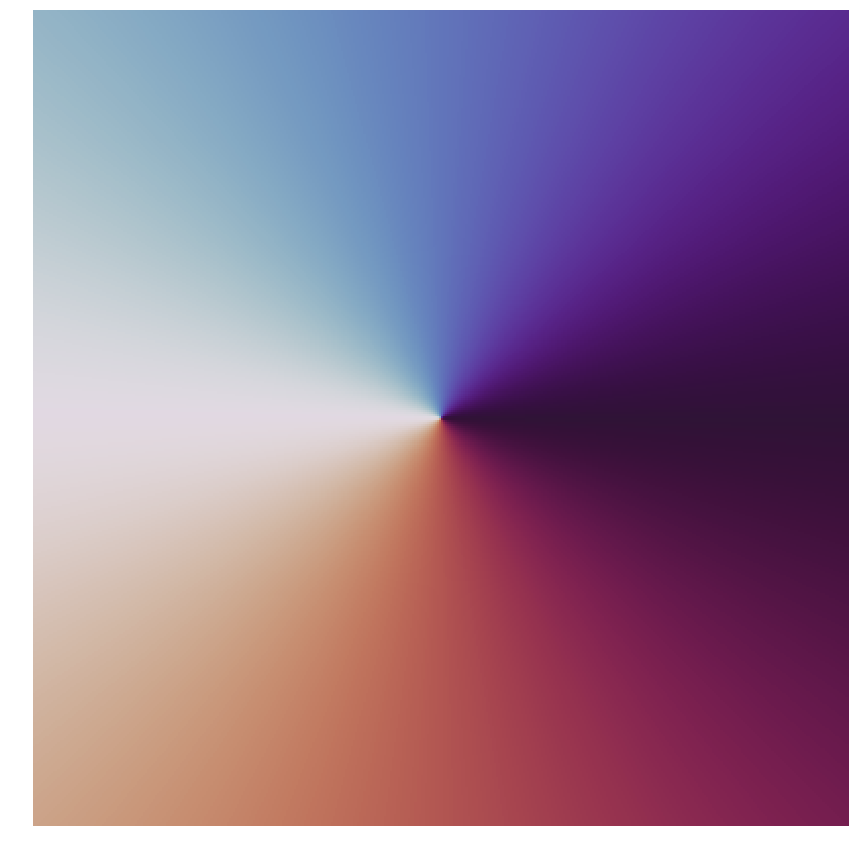

In [75]:
P = raw_complex_plot(lambda x: x, [-2, 2], [-2, 2], plot_points=400)
rgbs = P[0].rgb_data
extracted_colors = rgbs[:,:,0]
normalized_colors = (extracted_colors + float(pi)) / (2 * float(pi))
fig, ax = plt.subplots(figsize=[15,15])
ax.imshow(normalized_colors, cmap="twilight")
ax.axis("off")

In [76]:
fig.savefig("twilight_identity.png")

(-0.5, 399.5, 399.5, -0.5)

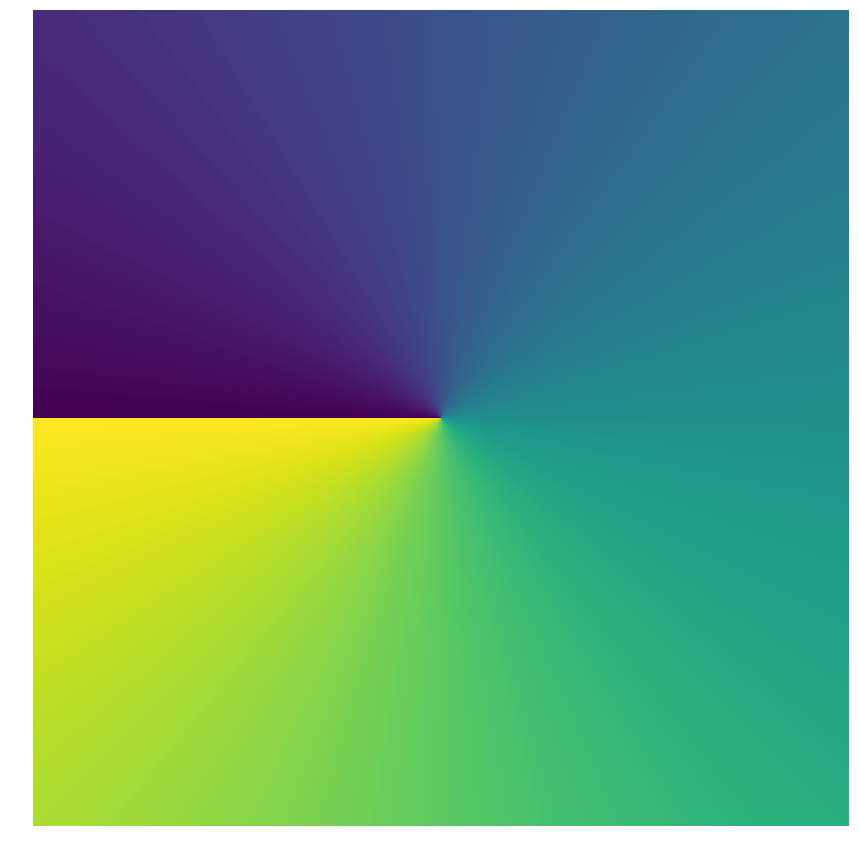

In [77]:
P = raw_complex_plot(lambda x: x, [-2, 2], [-2, 2], plot_points=400)
rgbs = P[0].rgb_data
extracted_colors = rgbs[:,:,0]
normalized_colors = (extracted_colors + float(pi)) / (2 * float(pi))
fig, ax = plt.subplots(figsize=[15,15])
ax.imshow(normalized_colors, cmap="viridis")
ax.axis("off")

In [78]:
fig.savefig("viridis_identity.png")

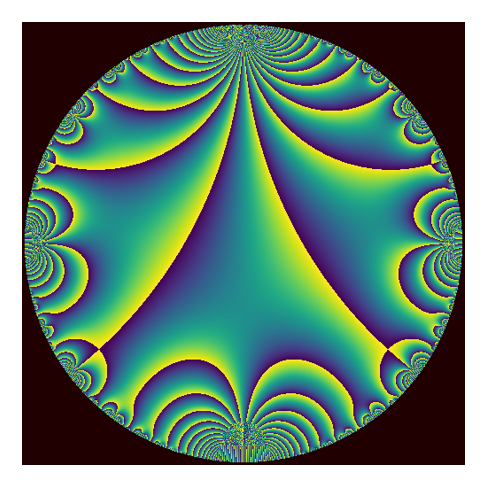

In [81]:
rP = raw_complex_plot(lambda x: +Infinity if abs(x) >= 0.99 else f(Dtoq(x)), (-1,1),(-1,1),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
rgbs = rP[0].rgb_data
extracted_colors = rgbs[:,:,0] # throw away lightness for now
normalized_colors = matplotlib.cm.get_cmap('viridis')((extracted_colors + float(pi)) / (2 * float(pi)))
noalpha = normalized_colors[:,:,:3]
noalpha[inds] = 0
rP[0].rgb_data = noalpha
rP.axes(show=False)
rP.show()

In [82]:
rP.save("viridis_f_onD.png", figsize=15, aspect_ratio=1)

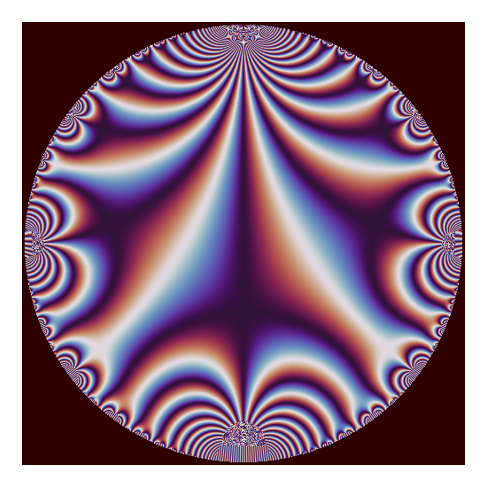

In [83]:
rP = raw_complex_plot(lambda x: +Infinity if abs(x) >= 0.99 else f(Dtoq(x)), (-1,1),(-1,1),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
rgbs = rP[0].rgb_data
extracted_colors = rgbs[:,:,0] # throw away lightness for now
normalized_colors = matplotlib.cm.get_cmap('twilight')((extracted_colors + float(pi)) / (2 * float(pi)))
noalpha = normalized_colors[:,:,:3]
noalpha[inds] = 0
rP[0].rgb_data = noalpha
rP.axes(show=False)
rP.show()

In [84]:
rP.save("twilight_f_onD.png", figsize=15, aspect_ratio=1)

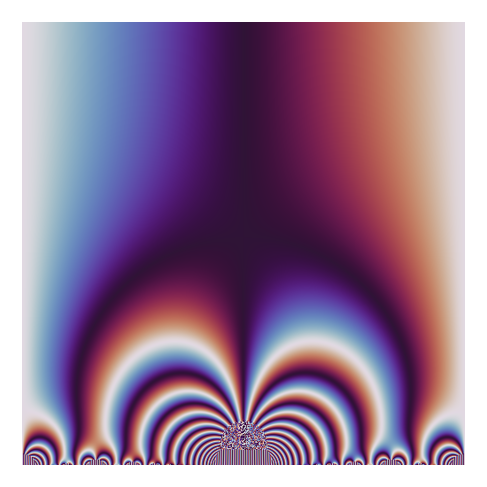

In [92]:
rP = raw_complex_plot(lambda x: f(Htoq(x)), (-.5,.5),(0.01,1.01),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
rgbs = rP[0].rgb_data
extracted_colors = rgbs[:,:,0] # throw away lightness for now
normalized_colors = matplotlib.cm.get_cmap('twilight')((extracted_colors + float(pi)) / (2 * float(pi)))
noalpha = normalized_colors[:,:,:3]
rP[0].rgb_data = noalpha
rP.axes(show=False)
rP.show()

In [93]:
rP.save("twilight_f_onH.png", figsize=15, aspect_ratio=1)

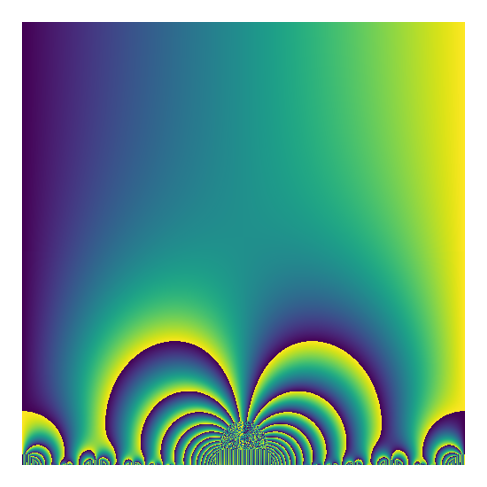

In [89]:
rP = raw_complex_plot(lambda x: f(Htoq(x)), (-.5,.5),(0.01,1.01),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
rgbs = rP[0].rgb_data
extracted_colors = rgbs[:,:,0] # throw away lightness for now
normalized_colors = matplotlib.cm.get_cmap('viridis')((extracted_colors + float(pi)) / (2 * float(pi)))
noalpha = normalized_colors[:,:,:3]
rP[0].rgb_data = noalpha
rP.axes(show=False)
rP.show()

In [90]:
rP.save("viridis_f_onH.png", figsize=15, aspect_ratio=1)

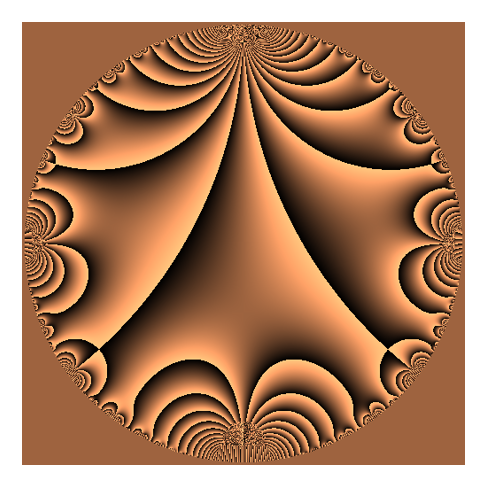

In [99]:
rP = raw_complex_plot(lambda x: +Infinity if abs(x) >= 0.99 else f(Dtoq(x)), (-1,1),(-1,1),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
rgbs = rP[0].rgb_data
extracted_colors = rgbs[:,:,0] # throw away lightness for now
normalized_colors = matplotlib.cm.get_cmap('copper')((extracted_colors + float(pi)) / (2 * float(pi)))
noalpha = normalized_colors[:,:,:3]
rP[0].rgb_data = noalpha
rP.axes(show=False)
rP.show()

In [100]:
rP.save("copper_f_onD.png", figsize=15, aspect_ratio=1)

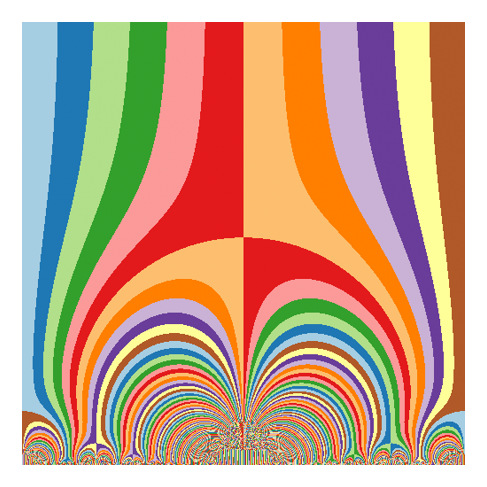

In [101]:
rP = raw_complex_plot(lambda x: f(Htoq(x)), (-.5,.5),(0.01,1.01),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
rgbs = rP[0].rgb_data
extracted_colors = rgbs[:,:,0] # throw away lightness for now
normalized_colors = matplotlib.cm.get_cmap('Paired')((extracted_colors + float(pi)) / (2 * float(pi)))
noalpha = normalized_colors[:,:,:3]
rP[0].rgb_data = noalpha
rP.axes(show=False)
rP.show()

In [102]:
rP.save("paired_f_onH.png", figsize=15, aspect_ratio=1)

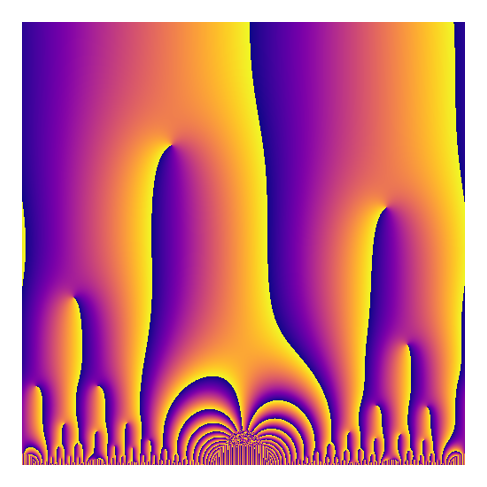

In [113]:
rP = raw_complex_plot(lambda x: g(Htoq(x)), (-.5,.5),(0.01,1.01),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
rgbs = rP[0].rgb_data
extracted_colors = rgbs[:,:,0] # throw away lightness for now
normalized_colors = matplotlib.cm.get_cmap('plasma')((extracted_colors + float(pi)) / (2 * float(pi)))
noalpha = normalized_colors[:,:,:3]
rP[0].rgb_data = noalpha
rP.axes(show=False)
rP.show()

In [114]:
rP.save("plasma_g_onH.png", figsize=15, aspect_ratio=1)

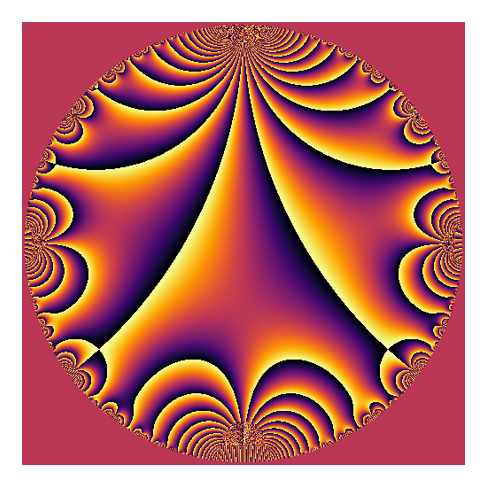

In [117]:
rP = raw_complex_plot(lambda x: +Infinity if abs(x) >= 0.99 else f(Dtoq(x)), (-1,1),(-1,1),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
rgbs = rP[0].rgb_data
extracted_colors = rgbs[:,:,0] # throw away lightness for now
normalized_colors = matplotlib.cm.get_cmap('inferno_r')((extracted_colors + float(pi)) / (2 * float(pi)))
noalpha = normalized_colors[:,:,:3]
rP[0].rgb_data = noalpha
rP.axes(show=False)
rP.show()

In [118]:
rP.save("inferno_f_onH.png", figsize=15, aspect_ratio=1)

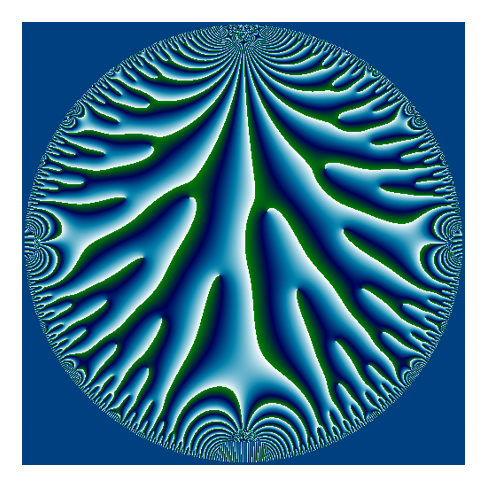

In [111]:
rP = raw_complex_plot(lambda x: +Infinity if abs(x) >= 0.99 else g(Dtoq(x)), (-1,1),(-1,1),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
rgbs = rP[0].rgb_data
extracted_colors = rgbs[:,:,0] # throw away lightness for now
normalized_colors = matplotlib.cm.get_cmap('ocean')((extracted_colors + float(pi)) / (2 * float(pi)))
noalpha = normalized_colors[:,:,:3]
rP[0].rgb_data = noalpha
rP.axes(show=False)
rP.show()

In [112]:
rP.save("ocean_g_onH.png", figsize=15, aspect_ratio=1)

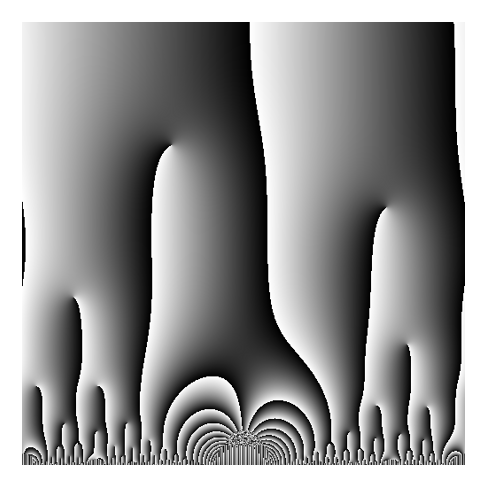

In [119]:
rP = raw_complex_plot(lambda x: g(Htoq(x)), (-.5,.5),(0.01,1.01),
             plot_points=500, aspect_ratio = 1, figsize=[5,5])
rgbs = rP[0].rgb_data
extracted_colors = rgbs[:,:,0] # throw away lightness for now
normalized_colors = matplotlib.cm.get_cmap('gray_r')((extracted_colors + float(pi)) / (2 * float(pi)))
noalpha = normalized_colors[:,:,:3]
rP[0].rgb_data = noalpha
rP.axes(show=False)
rP.show()

In [120]:
rP.save("gray_g_onH.png", figsize=15, aspect_ratio=1)